## Задача 1
- Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
- Считать данные с помощью pandas
- Вывести на экран первые 5 строк
- 1.1 Изучите количество памяти с помощью matplotlib
- 1.2 Изучите стоимость ноутбуков с помощью matplotlib
- 1.3 Изучите вес ноутбуков с помощью matplotlib
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("laptops_10.csv")
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


### 1.1 Изучите количество памяти с помощью matplotlib


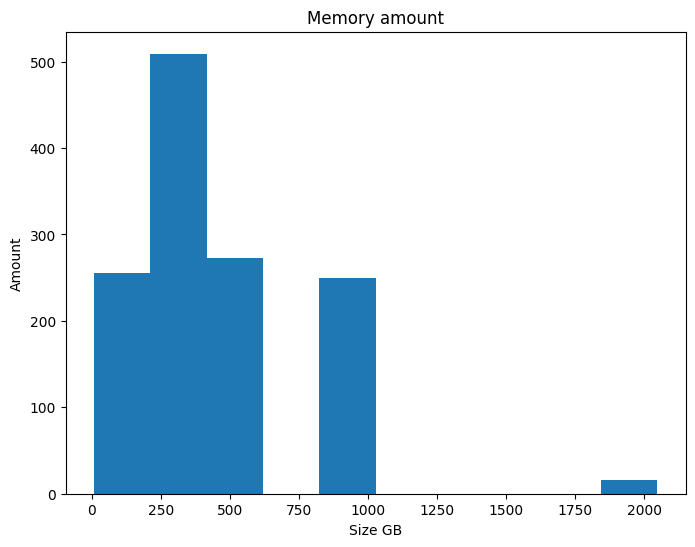

In [2]:
plt.figure(figsize=[8,6])
plt.title("Memory amount")
plt.xlabel("Size GB")
plt.ylabel("Amount")
plt.hist(df["Memory_Amount"]);

### 1.2 Изучите стоимость ноутбуков с помощью matplotlib


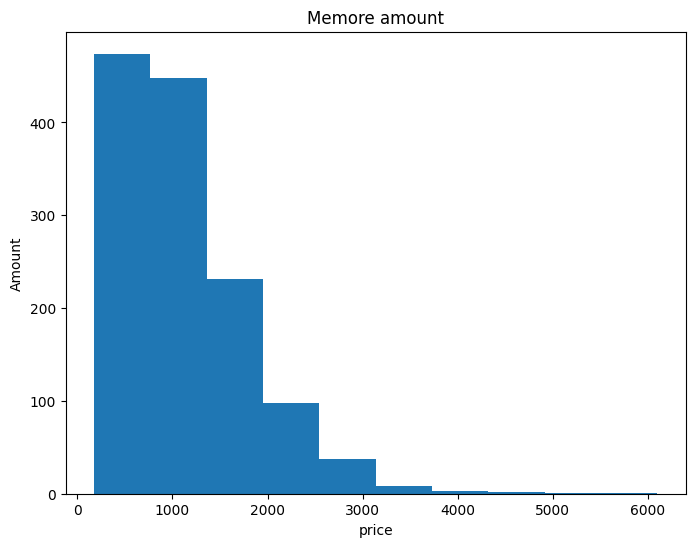

In [3]:
plt.figure(figsize=[8,6])
plt.title("Memore amount")
plt.xlabel("price")
plt.ylabel("Amount")
plt.hist(df["Price_euros"]);

### 1.3 Изучите вес ноутбуков с помощью matplotlib


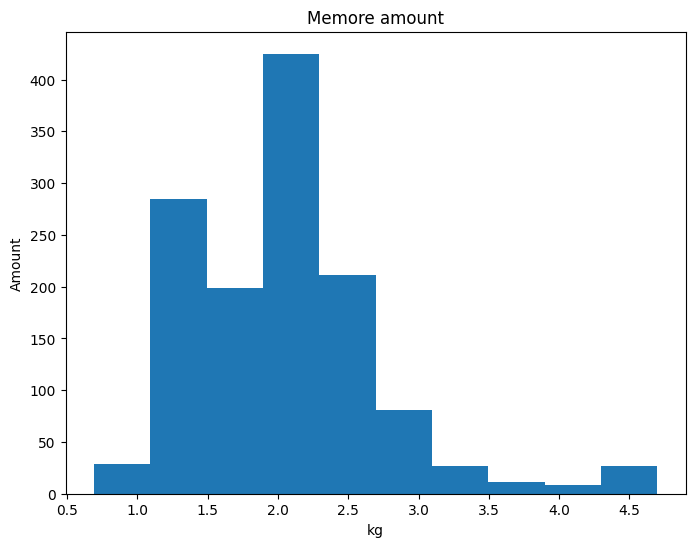

In [4]:
plt.figure(figsize=[8,6])
plt.title("Memore amount")
plt.xlabel("kg")
plt.ylabel("Amount")
plt.hist(df["Weight"]);

## Задача 2
- 2.1 Изучите распределение типов носителя
- 2.2 Изучите распределение компаний производителей
- 2.3 Изучите распределение операционной системы
- 2.4 Изучите распределение компаний производителей CPU
### 2.1 Изучите распределение типов носителя

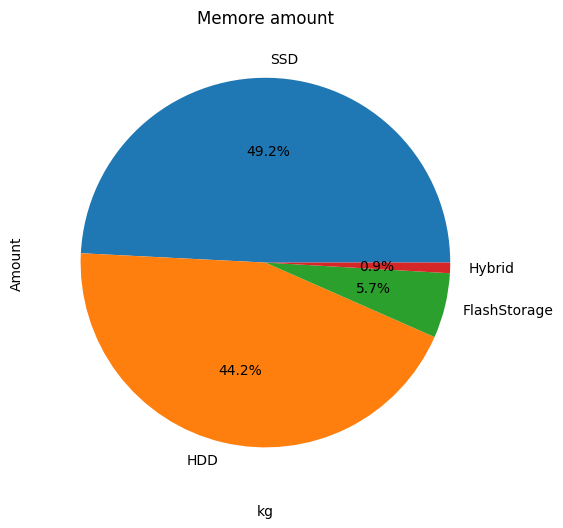

In [5]:
plt.figure(figsize=[8,6])
plt.title("Memore amount")
plt.xlabel("kg")
plt.ylabel("Amount")
plt.pie(df["Memory_Type"].value_counts(), autopct="%1.1f%%", labels=df["Memory_Type"].value_counts().index);

### 2.2 Изучите распределение компаний производителей

AttributeError: Text.set() got an unexpected keyword argument 'rotations'

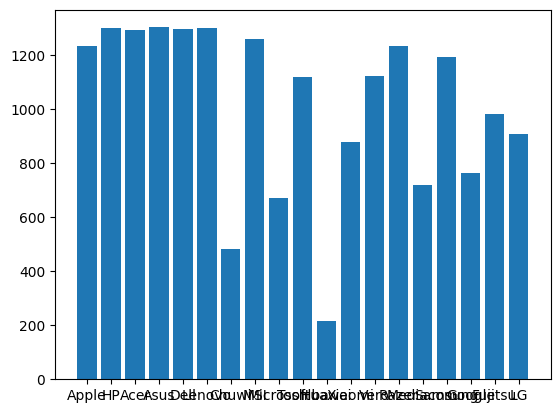

In [6]:


plt.bar(df["Company"].values, df["Company"].index)
plt.xticks(rotations = 30)

### 2.3 Изучите распределение операционной системы


AttributeError: Text.set() got an unexpected keyword argument 'rotations'

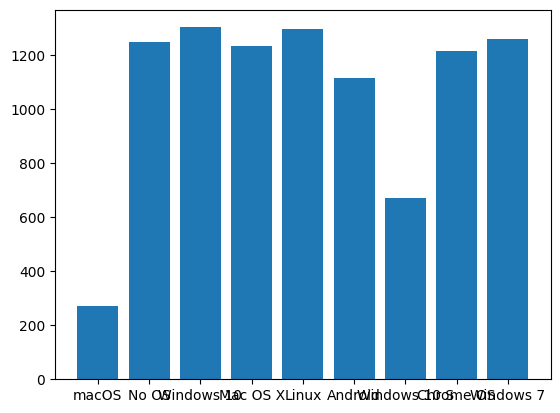

In [ ]:

plt.bar(df["OpSys"].values, df["OpSys"].index)
plt.xticks(rotations = 30)

### 2.4 Изучите распределение компаний производителей CPU


{'whiskers': [<matplotlib.lines.Line2D at 0x1d0b781a410>,
 'caps': [<matplotlib.lines.Line2D at 0x1d0b781a950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d0b781a170>],
 'medians': [<matplotlib.lines.Line2D at 0x1d0b781ae90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d0b781b130>],
 'means': []}

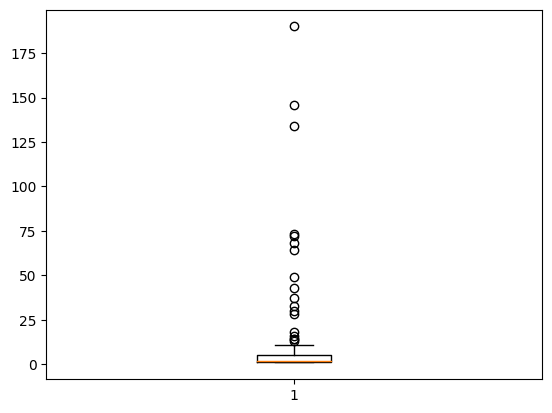

In [ ]:
plt.boxplot(df["Cpu"].value_counts())

## Задача 3
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

- 3.1 Постройте график в абсолютных величинах
- 3.2 Постройте график в относительных величинах


### 3.1 Постройте график в абсолютных величинах

KeyError: 'Company'

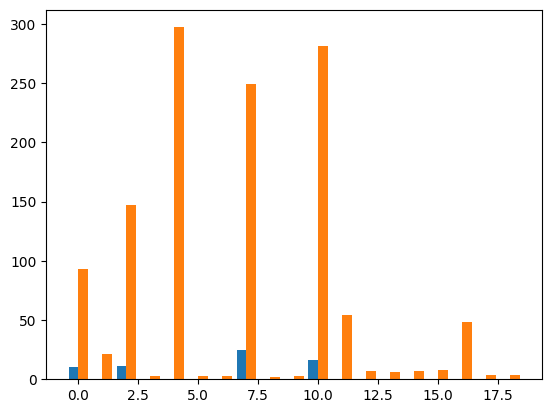

In [9]:
import numpy as np
x = pd.crosstab(index=df["Company"], columns=df["Cpu_Company"])
x.drop(columns=["Samsung"]).reset_index()
offset = 0.2
w = 0.4
n_ticks = np.arange(len(x['AMD']))
plt.bar(n_ticks - offset, x['AMD'], width=w)
plt.bar(n_ticks + offset, x['Intel'], width=w)
plt.xticks(n_ticks, x["Company"], rotation=30)

In [11]:
x = pd.crosstab(index=df["Company"], columns=df["Cpu_Company"], normalize='index')
x.drop(columns=["Samsung"]).reset_index()
offset = 0.2
w = 0.4
n_ticks = np.arange(len(x['AMD']))
plt.bar(x['Company'], x['AMD'], width=w)
plt.bar(x['Company'], x['Intel'], bottom=x['AMD'], width=w)
plt.xticks(rotation=30)

KeyError: 'Company'

## Задача 4
4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора
4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти
4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти
4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы


###  4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

<AxesSubplot: xlabel='Price_euros', ylabel='Cpu_Company'>

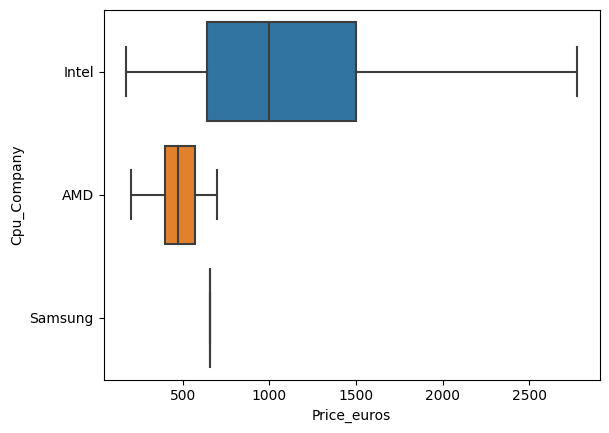

In [14]:
import seaborn as sns
sns.boxplot(x=df["Price_euros"], y=df["Cpu_Company"], showfliers=False)

### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

<AxesSubplot: xlabel='Price_euros', ylabel='Memory_Type'>

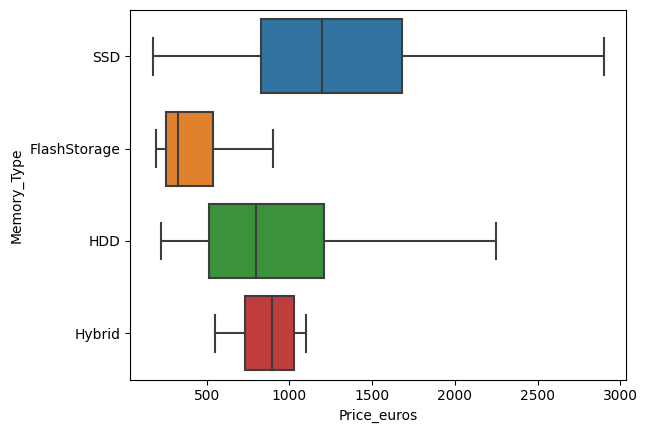

In [15]:
sns.boxplot(x=df["Price_euros"], y=df["Memory_Type"], showfliers=False)

### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

<AxesSubplot: xlabel='Price_euros', ylabel='Ram'>

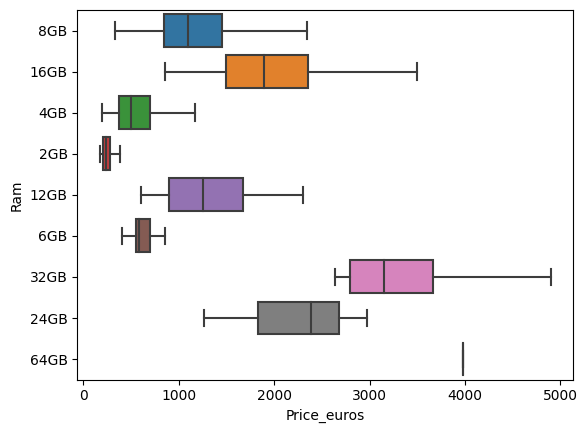

In [17]:
sns.boxplot(x=df["Price_euros"], y=df["Ram"].astype("str"), showfliers=False)

## 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

<AxesSubplot: xlabel='Price_euros', ylabel='Company'>

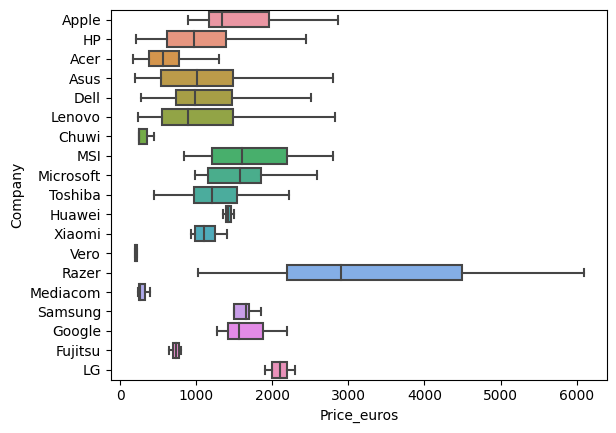

In [18]:
sns.boxplot(x=df["Price_euros"], y=df["Company"].astype("str"), showfliers=False)

## Задача 5
Постройте матрицу корреляций для таблицы

C:\Users\slava\AppData\Local\Temp\ipykernel_10648\1960202868.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=1 , cmap="plasma")


<AxesSubplot: >

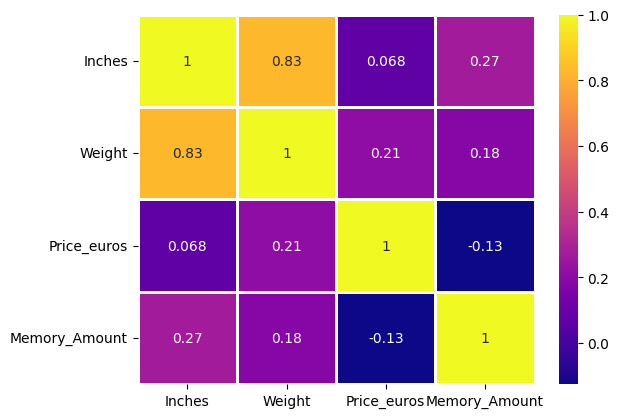

In [31]:
sns.heatmap(df.corr(), annot=True, linewidths=1 , cmap="plasma")

C:\Users\slava\AppData\Local\Temp\ipykernel_10648\2190253851.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =  df.corr()


<AxesSubplot: >

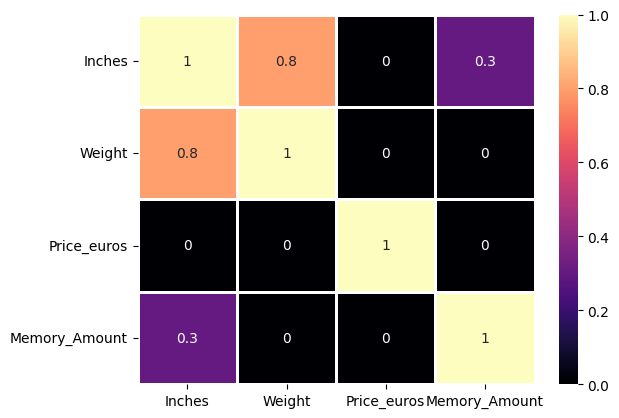

In [33]:
corr_matrix =  df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix
sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='magma')

In [36]:
import folium
df = pd.read_csv("../kc_house_data.csv")
this_map = folium.map(prefer_canvas = True)
def plotdot(x):
    folium.CircleMarker(location=[x.lat, y.long], radius=2).add_to(this_map)
    
df.apply(plotdot, axis=1)
this_map.fit_bounds(this_map.get_bounds())
this_map

TypeError: 'module' object is not callable